##Link to Scrap

In [90]:
link = "https://azure.microsoft.com/en-in/resources/cloud-computing-dictionary/what-is-cloud-computing"

## 1 Import Required Libraries  

In [91]:
from bs4 import BeautifulSoup
import requests
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string
from nltk.parse.generate import generate
from nltk.corpus import words
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import treebank
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('wordnet')
nltk.download('treebank')
nltk.download('universal_tagset')
from nltk.corpus import brown
from nltk.tag import hmm

# Download the Brown corpus
nltk.download('brown')

# Prepare training data
tagged_sentences = brown.tagged_sents(tagset='universal')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Pac

##2 Build Scrapping Function

In [92]:
def scrape_text(url):
    # Send a GET request to the URL
    response = requests.get(url)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find all text elements on the page
        text_elements = soup.find_all(string=True)
        # Extract and concatenate the text from each element
        text = ' '.join(element.strip() for element in text_elements if element.strip())
        return text
    else:
        print("Failed to retrieve the webpage.")
        return None

#**3 Text Processing**

### 3.1 Remove HTML Enclosed Text

In [93]:
def remove_enclosed_text(input_string):
    # Define a regular expression pattern to match text enclosed in < and >
    pattern = r'<[^>]*>'
    # Use re.sub() to replace matched patterns with an empty string
    new_string = re.sub(pattern, '', input_string)

    return new_string

### 3.2 Tokenize Text

In [94]:
def tokenize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    return tokens

### 3.3 Remove HTML Tokens

In [95]:
def remove_html_tokens(tokens):
    html_tag_pattern = r'<[^>]+>'
    # Remove HTML tags and tokens containing '<' or '>'
    clean_tokens = [token for token in tokens if not re.match(html_tag_pattern, token)]
    return clean_tokens

### 3.4 Remove Stopwords and Punctuations

In [96]:
def remove_stopwords_and_punctuation(words):
    # Get the set of stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords and punctuation
    clean_words = [word for word in words if word.lower()  not in stop_words and word.lower() not in string.punctuation]
    # Join the clean words back into a single string
    clean_text = ' '.join(clean_words)
    return clean_text

#**4 Create PCFG Parser**



In [97]:
def PCFG_Parser(sentences):
    pcfg_grammar = nltk.PCFG.fromstring("""
    S -> NP VP [1.0]
    VP -> V NP [0.7] | V [0.3]
    NP -> Det N [0.5] | N [0.3] | NP PP [0.2]
    PP -> P NP [1.0]
    Det -> 'the' [0.6] | 'a' [0.4]
    N -> 'microsoft' [0.4] | 'azure' [0.3] | 'product' [0.3]
    V -> 'compute' [0.4] | 'processing' [0.3] | 'deploying' [0.3]
    P -> 'on' [0.5] | 'in' [0.5]
    """)
    # Tokenize input sentences
    words = nltk.word_tokenize(sentences[0])

    # Filter out words not covered by the grammar
    valid_words = [word for word in words if word.lower() in pcfg_grammar._lexical_index]

    # Reconstruct filtered sentence
    filtered_sentence = " ".join(valid_words)

    # Parse filtered sentence based on PCFG
    parser = nltk.ViterbiParser(pcfg_grammar)
    for tree in parser.parse(filtered_sentence.split()):
        print(tree)


#**5 Encoding and Decoding Text Changes**


In [98]:
def Encoduing_Decoding (text_data):
  # Encode data
  encoded_data = text_data.encode('utf-8')
  # Decode data
  decoded_data = encoded_data.decode('utf-8')
  # Check for changes
  if text_data == decoded_data:
      print("No changes after encoding and decoding.")
  else:
      print("Changes occurred after encoding and decoding.")


#***Implementation of Data Collection and Segmentation***

In [99]:
text = scrape_text(link)
print(f"Scrap Text is : {text}")
print(type(text))
text = remove_enclosed_text(text)
print(f"\n\n\n Text after Extracting Enclosed Text is : {text}")
tokens = tokenize_text(text)
print(f"\n\n\n Tokens are : {tokens}")
tokens = remove_html_tokens(tokens)
print(f"\n\n\n Tokens after Removing HTML Tokens : {tokens}")
tokens = remove_stopwords_and_punctuation(tokens)
print(f"\n\n\n Tokens after Removing Stopwords and Punctuations {tokens}")
sentences = nltk.sent_tokenize(text)
PCFG_Parser(sentences)
Encoduing_Decoding(sentences[0])
main_text = text

Scrap Text is : HTML What Is Cloud Computing? | Microsoft Azure oc.geo.country = "US"; var isModernBrowser = (
            'fetch' in window &&
            'assign' in Object
        );

        if ( !isModernBrowser ) {
            var scriptElement = document.createElement('script');

            scriptElement.async = false;
            scriptElement.src = '/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js';

            var polyfillScriptElement = document.querySelector('#ie11-polyfill-script');

            if (polyfillScriptElement) {
                polyfillScriptElement.parentNode.insertBefore(scriptElement, polyfillScriptElement.nextSibling);
            }
        } var expToken = {
                    "exp": {
                        "target": {
                            "propertyToken": "3c148cf5-9769-f782-32c4-14f7eba5d269",
                            "visitorJsHash": "30368a72d017e4133bfd3b5d073d06ff",
                

#Literary Analysis:

## 6 Spell Check and Correction

In [100]:
print(len(tokens))
sents_shorted = ""
for i in range (500):
  if tokens[i]=='\n':
    continue
  sents_shorted += tokens[i]
print(sents_shorted)

45384
HTML Cloud Computing Microsoft Azure oc.geo.country `` US '' var isModernBrowser 'fetch window 'assign Object isModernBrowser var scriptElement document.createElement 'script scriptElement.async false scriptElement.src '/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js var polyfillScriptElement document.querySelector ie11-polyfill-script polyfillScriptElement polyfillScriptElement.parentNode.insertBefore scriptElement polyfillScriptElement.nex


In [101]:
# Load the list of valid English words
word_list = set(words.words())
def known(words):
    """Return the subset of words that are actually in the dictionary."""
    return set(w for w in words if w in word_list)

def edits1(word):
    """Create a set of words with one edit distance from the input word."""
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    """Create a set of words with two edit distances from the input word."""
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def candidates(word):
    """Generate possible spelling corrections for a word."""
    return (known([word]) or
            known(edits1(word)) or
            known(edits2(word)) or
            [word])

def probability(word, N=sum(Counter(words.words()).values())):
    """Probability of `word`."""
    return Counter(words.words())[word] / N

def correction(word):
    """Find the best correction for the word."""
    return max(candidates(word), key=probability)

def correct_text(text):
    """Correct all the words in the input text."""
    tokens = nltk.word_tokenize(text)
    corrected_tokens = [correction(word.lower()) if word.lower() not in word_list else word for word in tokens]
    return ' '.join(corrected_tokens)


# Correct the text
corrected_text = correct_text(sents_shorted)
print("Original text:", sents_shorted)
print("Corrected text:", corrected_text)


Original text: HTML Cloud Computing Microsoft Azure oc.geo.country `` US '' var isModernBrowser 'fetch window 'assign Object isModernBrowser var scriptElement document.createElement 'script scriptElement.async false scriptElement.src '/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js var polyfillScriptElement document.querySelector ie11-polyfill-script polyfillScriptElement polyfillScriptElement.parentNode.insertBefore scriptElement polyfillScriptElement.nex
Corrected text: heml Cloud commuting microvolt Azure oc.geo.country of US of far ismodernbrowser fetch window assign Object ismodernbrowser far scriptelement document.createelement script scriptelement.async false scriptelement.src '/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js far polyfillscriptelement document.queryselector ie11-polyfill-script polyfillscriptelement polyfillscriptelement.parentnode.insertbefore scriptelem

 ### 7 Utilizing NLTK to identify and categorize nouns and pronouns


In [102]:
def analyze_nouns_pronouns(text_data):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text_data)

    # Tokenize each sentence into words and tag POS
    pos_tagged = [nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in sentences]

    # Define tags for nouns and pronouns
    noun_tags = {'NN', 'NNS', 'NNP', 'NNPS'}
    pronoun_tags = {'PRP', 'PRP$', 'WP', 'WP$'}

    # Extract nouns and pronouns
    nouns = [word for sentence in pos_tagged for word, tag in sentence if tag in noun_tags]
    pronouns = [word for sentence in pos_tagged for word, tag in sentence if tag in pronoun_tags]

    # Count occurrences
    noun_counts = Counter(nouns)
    pronoun_counts = Counter(pronouns)

    # Analysis
    total_words = sum(len(sentence) for sentence in pos_tagged)
    total_nouns = sum(noun_counts.values())
    total_pronouns = sum(pronoun_counts.values())

    noun_distribution = {word: count / total_nouns for word, count in noun_counts.items()}
    pronoun_distribution = {word: count / total_pronouns for word, count in pronoun_counts.items()}

    print("Total words:", total_words)
    print("Total nouns:", total_nouns)
    print("Total pronouns:", total_pronouns)
    print("\nNoun counts:")
    print(noun_counts)
    print("\nPronoun counts:")
    print(pronoun_counts)
    print("\nNoun distribution:")
    print(noun_distribution)
    print("\nPronoun distribution:")
    print(pronoun_distribution)

    return noun_counts, pronoun_counts, noun_distribution, pronoun_distribution

# Example usage with scraped text data
noun_counts, pronoun_counts, noun_distribution, pronoun_distribution = analyze_nouns_pronouns(text)


Total words: 8627
Total nouns: 3840
Total pronouns: 183

Noun counts:
Counter({'Azure': 243, 'cloud': 104, 'data': 62, 'services': 50, 'apps': 43, 'applications': 39, 'background-color': 37, 'AI': 33, 'Build': 32, 'infrastructure': 31, 'Microsoft': 28, 'service': 27, 'Products': 26, 'resources': 25, 'solutions': 25, 'Cloud': 24, 'secure': 22, 'fff': 22, 'scale': 21, 'IoT': 20, 'platform': 19, 'development': 19, 'network': 19, 'security': 19, 'business': 18, 'software': 18, 'Windows': 17, 'Virtual': 17, 'SQL': 17, 'Service': 17, 'web': 17, 'analytics': 17, 'function': 15, 'computing': 14, 'Get': 13, 'tools': 13, 'Data': 13, 'Server': 13, 'storage': 13, 't': 12, 'Explore': 12, 'Kubernetes': 12, 'code': 12, 'time': 12, 'A': 12, 'migration': 12, 'application': 12, 'Resources': 12, 'innovation': 11, 'DevOps': 11, 'models': 11, 'Simplify': 11, 'workloads': 11, 'SaaS': 11, 'edge': 10, 'provider': 10, 'Hybrid': 10, 'Management': 10, 'Managed': 10, 'APIs': 10, 'management': 10, 'intelligence': 

### 8 Extracting all determiners and adjectives


In [103]:
def tokenize_text(text):
    """Tokenize the text into sentences and words."""
    sentences = nltk.sent_tokenize(text)
    words = [nltk.word_tokenize(sentence) for sentence in sentences]
    return words

def pos_tag_words(words):
    """POS tag the tokenized words."""
    tagged_words = [nltk.pos_tag(word) for word in words]
    return tagged_words

def extract_determiners_and_adjectives(tagged_words):
    """Extract determiners and adjectives from tagged words."""
    determiners = []
    adjectives = []

    for sentence in tagged_words:
        for word, tag in sentence:
            if tag in ['DT']:  # Determiners
                determiners.append(word)
            elif tag in ['JJ', 'JJR', 'JJS']:  # Adjectives
                adjectives.append(word)

    return determiners, adjectives

def frequency_distribution(words):
    """Calculate the frequency distribution of words."""
    freq_dist = Counter(words)
    return freq_dist

def analyze_context(tagged_words):
    """Analyze the context in which determiners and adjectives appear."""
    context_analysis = []

    for sentence in tagged_words:
        for i, (word, tag) in enumerate(sentence):
            if tag in ['DT', 'JJ', 'JJR', 'JJS']:
                context = sentence[max(i-2, 0):i+3]  # Get a window of words around the target word
                context_analysis.append((word, context))

    return context_analysis


# Process the text
tokenized_words = tokenize_text(text)
tagged_words = pos_tag_words(tokenized_words)
determiners, adjectives = extract_determiners_and_adjectives(tagged_words)

# Calculate frequency distributions
det_freq_dist = frequency_distribution(determiners)
adj_freq_dist = frequency_distribution(adjectives)

# Analyze context
context_analysis = analyze_context(tagged_words)

# Print the results
def print_results(det_freq_dist, adj_freq_dist, context_analysis):
    print("Determiners and their frequencies:")
    for word, freq in det_freq_dist.items():
        print(f"{word}: {freq}")

    print("\nAdjectives and their frequencies:")
    for word, freq in adj_freq_dist.items():
        print(f"{word}: {freq}")

    print("\nContext analysis of determiners and adjectives:")
    for word, context in context_analysis[:10]:  # Print only the first 10 for brevity
        context_words = ' '.join([w for w, t in context])
        print(f"Word: {word}\nContext: {context_words}\n")

print_results(det_freq_dist, adj_freq_dist, context_analysis)


Determiners and their frequencies:
a: 73
this: 1
the: 119
any: 26
all: 18
some: 1
an: 12
every: 2
The: 7
no: 4
A: 5
This: 3
that: 1
these: 2
Some: 1
These: 2
another: 1
both: 1

Adjectives and their frequencies:
Cloud: 3
var: 8
scriptElement.async: 1
scriptElement.src: 1
'/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js: 1
scriptElement: 1
expToken: 1
3c148cf5-9769-f782-32c4-14f7eba5d269: 1
isExpWithoutPersonalizationEnabled: 1
true: 4
window.cas: 1
[: 4
false: 13
//s.go-mpulse.net/boomerang/: 1
//s2.go-mpulse.net/boomerang/: 1
new: 5
/MSIE: 1
window.BOOMR.snippetMethod=: 1
a.src=: 1
window.BOOMR=window.BOOMR||: 1
i.parentNode.appendChild: 1
a=: 1
ak.rid: 1
=void: 1
rv: 1
is_complete: 1
free: 8
future-ready: 1
sustainable: 1
trusted: 5
more: 14
other: 8
key: 1
financial: 1
technical: 3
clear: 2
cloud: 33
proven: 3
successful: 1
popular: 2
virtual: 8
desktop: 2
anywhere: 1
up-to-date: 4
open: 6
scale: 10
powerful: 9
mobile: 7
live: 2

###9  NLTK to identify and extract verbs from the scraped data


In [104]:
def tokenize_text(text):
    """Tokenize the text into sentences and words."""
    sentences = nltk.sent_tokenize(text)
    words = [nltk.word_tokenize(sentence) for sentence in sentences]
    return words

def pos_tag_words(words):
    """POS tag the tokenized words."""
    tagged_words = [nltk.pos_tag(word) for word in words]
    return tagged_words

def extract_verbs(tagged_words):
    """Extract verbs from tagged words."""
    verbs = []

    for sentence in tagged_words:
        for word, tag in sentence:
            if tag.startswith('VB'):  # Verbs
                verbs.append((word, tag))

    return verbs

def analyze_verb_forms(verbs):
    """Analyze the different forms of verbs and their roles within sentences."""
    verb_forms = Counter(tag for word, tag in verbs)
    return verb_forms

def print_verb_analysis(verbs, verb_forms):
    """Print the analysis of verbs and their forms."""
    print("Verbs and their forms:")
    for word, tag in verbs:
        print(f"{word}: {tag}")

    print("\nFrequency of different verb forms:")
    for form, freq in verb_forms.items():
        print(f"{form}: {freq}")

# Process the text
tokenized_words = tokenize_text(text)
tagged_words = pos_tag_words(tokenized_words)
verbs = extract_verbs(tagged_words)
verb_forms = analyze_verb_forms(verbs)

# Print the results
print_verb_analysis(verbs, verb_forms)


Verbs and their forms:
Is: VBZ
=: VBZ
polyfillScriptElement.nextSibling: VBG
propertyToken: VBN
window.BOOMR_mq=window.BOOMR_mq||: VB
rua.trans: VBZ
rua.ims: VBZ
e.id=: VBN
t.id=n||: VBN
return: VBP
try: VB
d.close: VB
window.BOOMR.snippetExecuted: VBN
[: VBD
link: VB
r.relList.supports: VBZ
o: VBZ
]: VBP
o: VBP
==e.aFeoApplied: VBN
=: VB
is: VBZ
missing: VBG
undefined: VBD
=: VB
know: VB
display: VB
Featured: VBD
Azure: VBP
remote: VB
managed: VBN
create: VB
need: VBP
build: VB
operate: VB
edge: VB
using: VBG
developing: VBG
Azure: VBP
advanced: VBD
call: VB
monitor: VB
insight: VB
use: VBP
lake: VBP
maximizes: VBZ
made: VBN
connecting: VBG
cloud: VBP
use: VBP
scale: VB
managed: VBN
managed: VBD
built: VBN
operated: VBN
create: VB
host: VB
unused: VBD
run: VB
deploy: VB
using: VBG
Products: VBZ
manage: VB
managed: VBN
managed: VBD
operated: VBN
deploy: VB
using: VBG
Azure: VBP
run: VB
containerized: VBN
run: VBZ
managing: VBG
manage: VB
Kubernetes: VBZ
is: VBZ
automates: VBZ
running: 

### 10 Apply NLTK's tools to analyze the phrase structure


In [105]:
def tokenize_text(text):
    """Tokenize the text into sentences and words."""
    sentences = nltk.sent_tokenize(text)
    words = [nltk.word_tokenize(sentence) for sentence in sentences]
    return words

def pos_tag_words(words):
    """POS tag the tokenized words."""
    tagged_words = [nltk.pos_tag(word) for word in words]
    return tagged_words

def chunk_sentences(tagged_words):
    """Chunk the tagged words into phrases."""
    grammar = """
      NP: {<DT>?<JJ>*<NN.*>}  # Noun phrase
      VP: {<VB.*><NP|PP|CLAUSE>+$}  # Verb phrase
      PP: {<IN><NP>}  # Prepositional phrase
      CLAUSE: {<NP><VP>}  # Clause
    """
    chunk_parser = nltk.RegexpParser(grammar)
    chunked_sentences = [chunk_parser.parse(sentence) for sentence in tagged_words]
    return chunked_sentences

def parse_sentences(tagged_words):
    """Parse the tagged words using a context-free grammar (CFG)."""
    cfg_grammar = nltk.CFG.fromstring("""
        S -> NP
        NP -> Term | Term NP
        Term -> Word
        Word -> 'html' | 'C-DOT' | 'India' | 'Quantum' | 'Alliance' | 'Add' | 'Page' | 'Specific' | 'CSS' | 'en' | 'Search' | 'Centre' | 'Development' | 'Telematics' | 'Telecom' | 'Technology' | 'Govt' | 'Us' | 'Corporate' | 'Profile' | 'Organization' | 'Structure' | 'Success' | 'Stories' | 'Awards' | 'Accolades' | 'Business' | 'Model' | 'Products' | 'Optical' | 'Switching' | 'Routing' | 'Wireless' | 'Software' | 'Applications' | 'Legacy' | 'Solutions' | 'PM-WANI' | 'Broadcast' | 'Converged' | 'Disaster' | 'Management' | 'Post' | 'Quantum' | 'Cryptography' | 'Product' | 'Booklet' | 'Services' | 'Transfer' | 'O-RAN' | 'T'
    """)
    parser = nltk.ChartParser(cfg_grammar)
    parsed_sentences = []
    for sentence in tagged_words:
        try:
            # Convert to CFG-compatible format (only words)
            words = [word for word, tag in sentence]
            trees = list(parser.parse(words))
            parsed_sentences.append(trees)
        except ValueError:
            pass
    return parsed_sentences


# Process the text
tokenized_words = tokenize_text(sents_shorted)
tagged_words = pos_tag_words(tokenized_words)
chunked_sentences = chunk_sentences(tagged_words)
parsed_sentences = parse_sentences(tagged_words)

# Convert chunked sentences to single line output
print("Chunked sentences:")
for sentence in chunked_sentences:
    print(sentence.pformat(margin=10000))

# Convert parsed sentences to single line output
print("\nParsed sentences:")
for trees in parsed_sentences:
    for tree in trees:
        print(tree.pformat(margin=10000))

Chunked sentences:
(S (NP HTML/NNP) (NP Cloud/NNP) (NP Computing/NNP) (NP Microsoft/NNP) (NP Azure/NNP) (NP oc.geo.country/NN) ``/`` US/IN ``/`` var/FW (NP isModernBrowser/NN) 'fetch/POS (NP window/NN) 'assign/CD (NP Object/NNP) (NP isModernBrowser/NN) (NP var/NN) (NP scriptElement/JJ document.createElement/NN) 'script/POS (NP scriptElement.async/NN) (NP false/JJ scriptElement.src/NN) (NP '/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js/JJ var/NN) (NP polyfillScriptElement/NN) (NP document.querySelector/NN) (NP ie11-polyfill-script/JJ polyfillScriptElement/NN) (NP polyfillScriptElement.parentNode.insertBefore/NN) (NP scriptElement/NN) (NP polyfillScriptElement.nex/NN))

Parsed sentences:


### 11 Identify syntactic patterns and structures


In [106]:
# Define a simple grammar
grammar = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> DT NN | DT NNS
  VP -> VBZ VP
  DT -> 'a' | 'the'
  NN -> 'azure' | 'microsoft' | 'html'
  NNS -> 'languages'
  VBZ -> 'is' | 'are'
""")

# Create a parser
parser = nltk.ChartParser(grammar)
sentences = nltk.sent_tokenize(text.lower())
print("Sentences:", sentences)

# Word tokenization
words = [word_tokenize(sentence) for sentence in sentences]
print("Words:", words)
# Parse sentences
try:
  parsed_sentences = [list(parser.parse(word)) for word in words]
except:
  print("Grammer May Not have some word covered in Scrapped text")
print("Parsed Sentences:", parsed_sentences)
def extract_patterns(tree):
    patterns = []
    for subtree in tree.subtrees():
        patterns.append(subtree.label())
    return patterns

# Extract patterns from parsed sentences
all_patterns = []
for parsed_sentence in parsed_sentences:
    for tree in parsed_sentence:
        patterns = extract_patterns(tree)
        all_patterns.extend(patterns)

print("Syntactic Patterns:", all_patterns)


Sentences: ['html what is cloud computing?', '| microsoft azure oc.geo.country = "us"; var ismodernbrowser = (\n            \'fetch\' in window &&\n            \'assign\' in object\n        );\n\n        if ( !ismodernbrowser ) {\n            var scriptelement = document.createelement(\'script\');\n\n            scriptelement.async = false;\n            scriptelement.src = \'/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js\';\n\n            var polyfillscriptelement = document.queryselector(\'#ie11-polyfill-script\');\n\n            if (polyfillscriptelement) {\n                polyfillscriptelement.parentnode.insertbefore(scriptelement, polyfillscriptelement.nextsibling);\n            }\n        } var exptoken = {\n                    "exp": {\n                        "target": {\n                            "propertytoken": "3c148cf5-9769-f782-32c4-14f7eba5d269",\n                            "visitorjshash": "30368a72d017e4133bfd3

###12 Perform morphological analysis


In [109]:
# Tokenize the text into words
text = main_text
tokens = tokenize_text(text)
print(tokens)
# Perform Part-of-Speech tagging
# pos_tags = nltk.pos_tag(tokens)

# Perform morphological analysis
morphological_analysis = []
for token, pos_tag in pos_tags:
    # Get the WordNet POS tag
    wn_pos_tag = nltk.corpus.wordnet.NOUN
    if pos_tag.startswith('V'):
        wn_pos_tag = nltk.corpus.wordnet.VERB
    elif pos_tag.startswith('J'):
        wn_pos_tag = nltk.corpus.wordnet.ADJ
    elif pos_tag.startswith('R'):
        wn_pos_tag = nltk.corpus.wordnet.ADV

    # Perform lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma = lemmatizer.lemmatize(token, pos=wn_pos_tag)

    # Perform stemming (optional)
    porter_stemmer = nltk.stem.PorterStemmer()
    stemmed_token = porter_stemmer.stem(token)

    morphological_analysis.append((token, pos_tag, lemma, stemmed_token))

# Print the morphological analysis results
print("Token\tPOS Tag\tLemma\tStemmed Token")
for token, pos_tag, lemma, stemmed_token in morphological_analysis:
    print(f"{token}\t{pos_tag}\t{lemma}\t{stemmed_token}")


[['HTML', 'What', 'Is', 'Cloud', 'Computing', '?'], ['|', 'Microsoft', 'Azure', 'oc.geo.country', '=', '``', 'US', "''", ';', 'var', 'isModernBrowser', '=', '(', "'fetch", "'", 'in', 'window', '&', '&', "'assign", "'", 'in', 'Object', ')', ';', 'if', '(', '!', 'isModernBrowser', ')', '{', 'var', 'scriptElement', '=', 'document.createElement', '(', "'script", "'", ')', ';', 'scriptElement.async', '=', 'false', ';', 'scriptElement.src', '=', "'/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js", "'", ';', 'var', 'polyfillScriptElement', '=', 'document.querySelector', '(', "'", '#', 'ie11-polyfill-script', "'", ')', ';', 'if', '(', 'polyfillScriptElement', ')', '{', 'polyfillScriptElement.parentNode.insertBefore', '(', 'scriptElement', ',', 'polyfillScriptElement.nextSibling', ')', ';', '}', '}', 'var', 'expToken', '=', '{', '``', 'exp', "''", ':', '{', '``', 'target', "''", ':', '{', '``', 'propertyToken', "''", ':', '``', '3c148cf5-976

### 13 Implement POS tagging using Hidden Markov Model


In [110]:
tagged_sentences = treebank.tagged_sents()

# Split the corpus into training and testing sets
train_size = int(0.8 * len(tagged_sentences))
train_sents = tagged_sentences[:train_size]
test_sents = tagged_sentences[train_size:]

# Train the HMM POS tagger
tagger = hmm.HiddenMarkovModelTagger.train(train_sents)

# Evaluate the tagger on the test set
accuracy = tagger.accuracy(test_sents)
print("Accuracy:", accuracy)

# Test the tagger on a sample sentence
tokens = nltk.word_tokenize(sents_shorted.lower())
tagged_tokens = tagger.tag(tokens)
print("Tagged tokens:")
for word, tag in tagged_tokens:
  print(f"{word}   {tag}")

Accuracy: 0.901142771595389
Tagged tokens:
html   DT
cloud   NN
computing   NN
microsoft   .
azure   ''
oc.geo.country   VBZ
``   ``
us   PRP
``   ``
var   PRP
ismodernbrowser   MD
'fetch   VB
window   NN
'assign   .
object   ''
ismodernbrowser   PRP
var   MD
scriptelement   VB
document.createelement   VBN
'script   -NONE-
scriptelement.async   .
false   ''
scriptelement.src   PRP
'/etc.clientlibs/cascade.component.authoring/clientlibs/clientlib-polyfills/resources/ie11-polyfills.js   MD
var   VB
polyfillscriptelement   VBN
document.queryselector   -NONE-
ie11-polyfill-script   .
polyfillscriptelement   ''
polyfillscriptelement.parentnode.insertbefore   PRP
scriptelement   MD
polyfillscriptelement.nex   VB


Summary

###***Data Processing Methods:***

### Utilize simple N-gram models for language modeling


In [111]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from collections import defaultdict

# Define function for generating n-grams
def generate_ngrams(text, n):
    words = text.split()
    return ngrams(words, n)

# Function to build N-gram language model with Laplace smoothing
def build_ngram_model(corpus, n, smoothing=1):
    ngram_counts = defaultdict(int)
    context_counts = defaultdict(int)

    for sentence in corpus:
        for ngram_tuple in generate_ngrams(sentence, n):
            context = ngram_tuple[:-1]
            word = ngram_tuple[-1]
            context_counts[context] += 1
            ngram_counts[ngram_tuple] += 1

    vocabulary_size = len(set(word for sentence in corpus for word in sentence.split()))

    def laplace_smoothing(ngram, context):
        numerator = ngram_counts[ngram] + smoothing
        denominator = context_counts[context] + smoothing * vocabulary_size
        return numerator / denominator

    return laplace_smoothing

# Build a trigram model with Laplace smoothing
trigram_model = build_ngram_model(sentences, n=3)

# Example usage: Calculate probability of a word given context
example_context = ('cloud', 'computing')
example_word = 'azure'
probability = trigram_model((example_context + (example_word,)), example_context)
print(f"Probability of '{example_word}' given context '{example_context}': {probability:.4f}")

# Perform Latent Semantic Analysis (LSA) for semantic analysis and dimensionality reduction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

print("\nLSA Representation of Documents:")
for i, doc in enumerate(sentences):
    print(f"Document {i+1}: {X_reduced[i]}")


Probability of 'azure' given context '('cloud', 'computing')': 0.0006

LSA Representation of Documents:
Document 1: [ 0.23074387 -0.08239261]
Document 2: [2.76753538 7.70731157]
Document 3: [107.21609931  55.35317905]
Document 4: [ 83.30482049 -23.02353854]
Document 5: [ 7.87267545 -1.53245071]
Document 6: [ 99.4855432  -30.44161404]
Document 7: [ 49.1667404  -11.28823905]
Document 8: [ 0.38210837 -0.06526939]
Document 9: [ 1.38288626 -0.65306416]
Document 10: [ 2.02716423 -0.55290224]
Document 11: [ 2.25256471 -0.62581107]
Document 12: [ 1.61290942 -0.56121279]
Document 13: [ 0.69941976 -0.18663291]
Document 14: [ 0.85577793 -0.45650726]
Document 15: [ 0.52679255 -0.18255135]
Document 16: [ 4.57856831 -0.99376402]
Document 17: [ 3.46506025 -0.58661942]
Document 18: [ 0.90372747 -0.31663247]
Document 19: [1.31628952 0.28708923]
Document 20: [0.75153627 0.17800998]
Document 21: [ 2.1998497 -0.5883244]
Document 22: [ 2.02716423 -0.55290224]
Document 23: [1.56923224 0.20352975]
Document 2

### How is morphological analysis useful in selecting smoothing methods?

### Apply SVD and LSA for dimensionality reduction and semantic analysis

In [112]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Create a CountVectorizer to convert text data into a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Apply Singular Value Decomposition (SVD) for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

# Print the reduced-dimensional representations of the documents
print("LSA Representation of Documents:")
for i, doc in enumerate(sentences):
    print(f"Document {i+1}: {X_reduced[i]}")


LSA Representation of Documents:
Document 1: [ 0.23074387 -0.08239262]
Document 2: [2.76753538 7.70731157]
Document 3: [107.21609931  55.35317905]
Document 4: [ 83.30482049 -23.02353854]
Document 5: [ 7.87267545 -1.53245069]
Document 6: [ 99.4855432  -30.44161404]
Document 7: [ 49.1667404  -11.28823906]
Document 8: [ 0.38210837 -0.06526939]
Document 9: [ 1.38288626 -0.65306416]
Document 10: [ 2.02716423 -0.55290224]
Document 11: [ 2.25256471 -0.62581108]
Document 12: [ 1.61290942 -0.56121279]
Document 13: [ 0.69941976 -0.18663291]
Document 14: [ 0.85577793 -0.45650726]
Document 15: [ 0.52679255 -0.18255135]
Document 16: [ 4.57856831 -0.99376402]
Document 17: [ 3.46506025 -0.58661942]
Document 18: [ 0.90372747 -0.31663247]
Document 19: [1.31628952 0.28708923]
Document 20: [0.75153627 0.17800998]
Document 21: [ 2.1998497 -0.5883244]
Document 22: [ 2.02716423 -0.55290224]
Document 23: [1.56923224 0.20352975]
Document 24: [ 5.57705693 -1.9339703 ]
Document 25: [ 1.76871137 -0.74392328]
Doc

####Data Prediction and Result Formation:

###4.1 Embeddings from prediction models to capture semantic similarities between words.

In [113]:
tokenized_text = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Get vocabulary from the model
vocabulary = w2v_model.wv.index_to_key

# Access word vectors while handling KeyError
for word in vocabulary:
    try:
        vector = w2v_model.wv[word]
        # print(f"Vector for '{word}': {vector}")
    except KeyError:
        print(f"'{word}' is not present in the vocabulary of the Word2Vec model.")
word_pairs = [('cloud', 'computing'), ('microsoft', 'azure'), ('azure', 'cloud')]

# Compute the cosine similarity between the two word vectors
for word1,word2 in word_pairs:
  vector_one = w2v_model.wv[word1]
  vector_two = w2v_model.wv[word2]
  similarity = w2v_model.wv.cosine_similarities(vector_one, [vector_two])
  print(f"Semantic similarity between '{word1}' and '{word2}': {similarity[0]}")

Semantic similarity between 'cloud' and 'computing': 0.9991589188575745
Semantic similarity between 'microsoft' and 'azure': 0.9977278709411621
Semantic similarity between 'azure' and 'cloud': 0.9993994235992432


###Node graph based on similarities between words. Create a node graph with raw data as well as data obtained from SVD. Find the difference between both cases


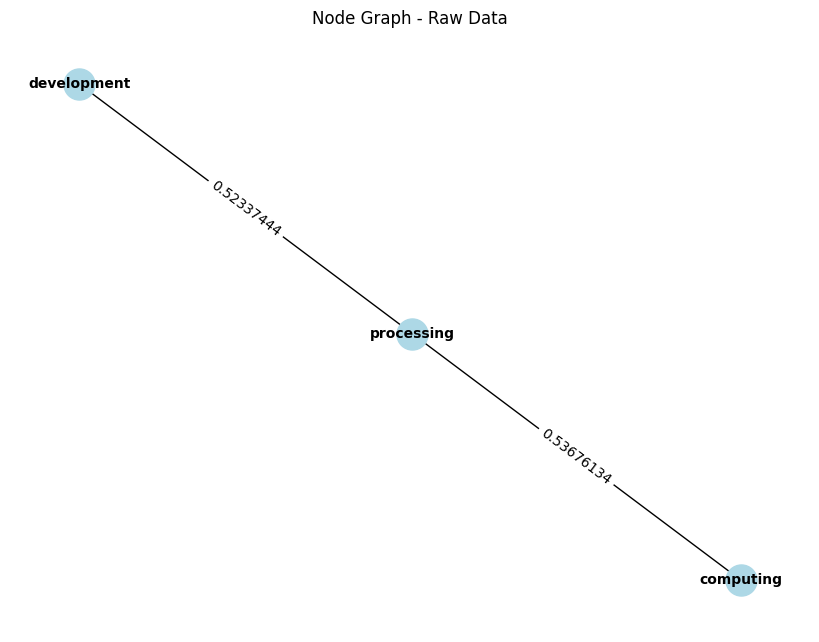

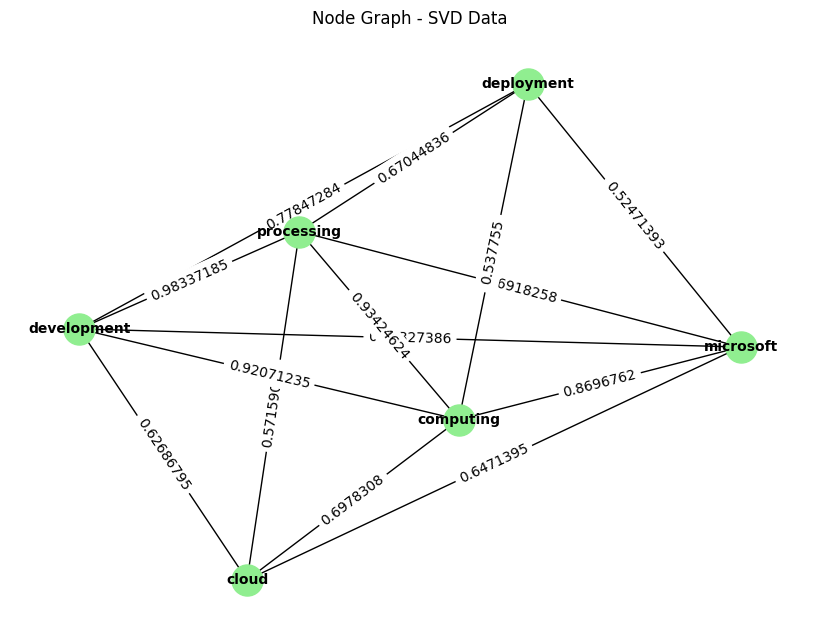

Differences in edge weights between the raw and SVD graphs:
('computing', 'processing'): 0.3975
('processing', 'development'): 0.4600


In [114]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.decomposition import TruncatedSVD
import networkx as nx
import matplotlib.pyplot as plt

# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Example words
vocabulary = ["azure", "microsoft", "cloud", "computing", "processing", "deployment",'development']

# Get word vectors
word_vectors = np.array([glove_model[word] for word in vocabulary])
# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(word_vectors)

def create_node_graph(similarity_matrix, vocabulary, threshold=0.5):
    G = nx.Graph()
    for i, word1 in enumerate(vocabulary):
        for j, word2 in enumerate(vocabulary):
            if i != j and similarity_matrix[i, j] > threshold:
                G.add_edge(word1, word2, weight=similarity_matrix[i, j])
    return G

# Create node graph with raw data
G_raw = create_node_graph(similarity_matrix, vocabulary)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_raw)
nx.draw(G_raw, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G_raw, 'weight')
nx.draw_networkx_edge_labels(G_raw, pos, edge_labels=labels)
plt.title("Node Graph - Raw Data")
plt.show()

def apply_svd(similarity_matrix, n_components=5):
    svd = TruncatedSVD(n_components=n_components)
    reduced_matrix = svd.fit_transform(similarity_matrix)
    # Recalculate similarity on the reduced matrix
    similarity_svd = cosine_similarity(reduced_matrix)
    return similarity_svd

# Apply SVD to reduce dimensionality
similarity_svd_matrix = apply_svd(similarity_matrix)

# Create node graph with SVD data
G_svd = create_node_graph(similarity_svd_matrix, vocabulary)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G_svd)
nx.draw(G_svd, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G_svd, 'weight')
nx.draw_networkx_edge_labels(G_svd, pos, edge_labels=labels)
plt.title("Node Graph - SVD Data")
plt.show()
def compare_graphs(G1, G2):
    differences = {}
    for edge in G1.edges(data=True):
        node1, node2, weight1 = edge
        weight1 = weight1['weight']
        weight2 = G2[node1][node2]['weight'] if G2.has_edge(node1, node2) else 0
        differences[(node1, node2)] = abs(weight1 - weight2)
    return differences

# Compare the two graphs
differences = compare_graphs(G_raw, G_svd)
print("Differences in edge weights between the raw and SVD graphs:")
for edge, diff in differences.items():
    print(f"{edge}: {diff:.4f}")


###Explore techniques for Machine Translation to translate text from one language to another and translate back.

In [ ]:
!pip install transformers torch


In [117]:
import torch
from transformers import MarianMTModel, MarianTokenizer

def translate(text, source_lang, target_lang):
    model_name = f"Helsinki-NLP/opus-mt-{source_lang}-{target_lang}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True)

    # Perform translation
    with torch.no_grad():
        translated_ids = model.generate(**inputs)

    # Decode the translated text
    translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
    return translated_text

# Translate from English to Hindi
new_text = text[0:512] # Token indices sequence length is longer than the specified maximum sequence length for this model (13450 > 512). Running this sequence through the model will result in indexing errors
translated_to_hindi = translate(new_text, "en", "hi")
print("Translated to Hindi:", translated_to_hindi)

# Translate back from Hindi to English
translated_back_to_english = translate(translated_to_hindi, "hi", "en")
print("Translated back to English:", translated_back_to_english)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translated to Hindi: एचटीएमएल क्या scuting है? scuting? scro. procutio = "Setlio; "Setcherer" विंडो में मोडर है = ('foc); यदि (!) (! scherrocrocroterrocrro. srrro. srrrrrrrrrrrrrrrrrrr = s. s. srrrrrrrrr = s. srrrrrrrrrrrrrrrr = s. sources. itrrrrrrrrrrro/ grrrirrrrririr- g. los. source. source. twny / twrrrrrrrrrrrro. loy- grrrrrrrrrrrrrrrrro. lop/ grrrrrrro. loc. locro < vsro. locro. locro. lop/ trrrrrrrrrro. locro. lodro. locro. locro. locrrro. locro. locro. locro. lowrrrro. lowro. lowrrrrrrrrrrrro. lowrrrrrrrrrrrrrrirrrrrrrrrirrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrro. lownrrrrrrrrrrrrrrrrrrrrrrrrrrrrirrrrrrro. lophro. lowrrrrrrro
Translated back to English: What is HTML crrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr.rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr.rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr.rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr

In [119]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import torch
from transformers import MarianMTModel, MarianTokenizer

def translate(text, source_lang, target_lang):
    model_name = f"Helsinki-NLP/opus-mt-{source_lang}-{target_lang}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True)

    # Perform translation
    with torch.no_grad():
        translated_ids = model.generate(**inputs)

    # Decode the translated text
    translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
    return translated_text

# Example text related to Azure Cloud
text = "Azure Cloud provides a wide range of services including computing, analytics, storage, and networking."

# Translate from English to Hindi
translated_to_hindi = translate(text, "en", "hi")
print("Translated to Hindi:", translated_to_hindi)

# Human reference translation
reference_translation = "एज्योर क्लाउड कंप्यूटिंग, विश्लेषिकी, संग्रहण, और नेटवर्किंग सहित कई प्रकार की सेवाएं प्रदान करता है।"

# Tokenize the reference and machine translations
reference_tokens = [reference_translation.split()]
candidate_tokens = translated_to_hindi.split()

# Compute BLEU score
smoothie = SmoothingFunction().method4
bleu_score = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=smoothie)
print("BLEU Score:", bleu_score)


Translated to Hindi: धूप के बादल बहुत - से सेवाएँ प्रदान करते हैं ।
BLEU Score: 0.015013902814994599


###Use WSD for finding word meanings in context for machine translation data

In [121]:
import nltk
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn
from transformers import MarianMTModel, MarianTokenizer
import torch

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Example sentence
sentence = "Azure is Pay as you go platform i.e for only those services which you desire to use"

# Tokenize sentence
tokens = nltk.word_tokenize(sentence)

# Disambiguate each word in the sentence
disambiguated_sentence = []
for token in tokens:
    synset = lesk(sentence, token)
    if synset:
        # Use the lemma of the word sense as the context
        disambiguated_sentence.append(synset.lemmas()[0].name())
    else:
        disambiguated_sentence.append(token)

# Join the disambiguated context into a single string
disambiguated_context = ' '.join(disambiguated_sentence)
print("Disambiguated Sentence:", disambiguated_context)

# Function to translate text using a pre-trained MarianMT model
def translate(text, source_lang, target_lang):
    model_name = f"Helsinki-NLP/opus-mt-{source_lang}-{target_lang}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)

    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True)

    # Perform translation
    with torch.no_grad():
        translated_ids = model.generate(**inputs)

    # Decode the translated text
    translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
    return translated_text

# Translate from English to Hindi
translated_to_hindi = translate(disambiguated_context, "en", "hi")
print("Translated to Hindi:", translated_to_hindi)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Disambiguated Sentence: azure embody pay_up deoxyadenosine_monophosphate you sound platform i.e for only those service which you desire to use
Translated to Hindi: सिर्फ उन्हीं सेवा के लिए जिन्हें आप इस्तेमाल करना चाहते हैं
